In [8]:
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

In [4]:
mnist_data = tf.keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
def scale_mnist_data(train_images, test_images):
  """ 
  Escalando as imagens para os valores serem de 0 a 1
  """

  train_images = train_images / 255 
  test_images = test_images / 255 

  return train_images, test_images

In [50]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [7]:
#Adicionando um canal de dimissionamento ficticio

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_image = scaled_test_image[..., np.newaxis]

In [27]:
def get_model(input_shape):

  model = Sequential([
    Conv2D(8, (3,3), padding= 'SAME', activation='relu', input_shape = input_shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

  return model

In [28]:
scaled_train_images[0].shape

(28, 28, 1)

In [29]:
model = get_model(scaled_train_images[0].shape)

In [30]:
print(model)

In [31]:
def compile_model(model):

  opt = tf.keras.optimizers.Adam(learning_rate=0.005)

  model.compile(optimizer = opt,
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'] )

In [32]:
compile_model(model)

### Treinar o modelo

In [37]:
def train_model(model, scaled_train_images, train_labels):

  history = model.fit(scaled_train_images[..., np.newaxis], train_labels, epochs=5, batch_size = 32, verbose=2)

  return history

In [38]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 - 8s - loss: 0.2048 - accuracy: 0.9343 - 8s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 8s - loss: 0.0751 - accuracy: 0.9765 - 8s/epoch - 4ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0632 - accuracy: 0.9806 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 7s - loss: 0.0552 - accuracy: 0.9829 - 7s/epoch - 4ms/step
Epoch 5/5
1875/1875 - 7s - loss: 0.0484 - accuracy: 0.9852 - 7s/epoch - 4ms/step


In [40]:
frame = pd.DataFrame(history.history)
frame.head()

,loss,accuracy
0,0.204797,0.934300
1,0.075137,0.976533
2,0.063171,0.980583
3,0.055151,0.982883
4,0.048363,0.985250


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

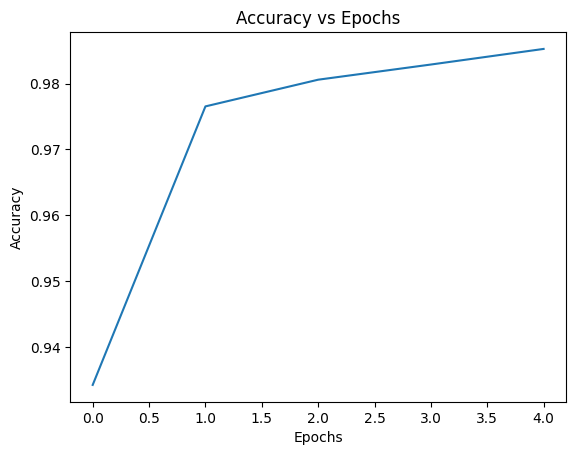

In [41]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

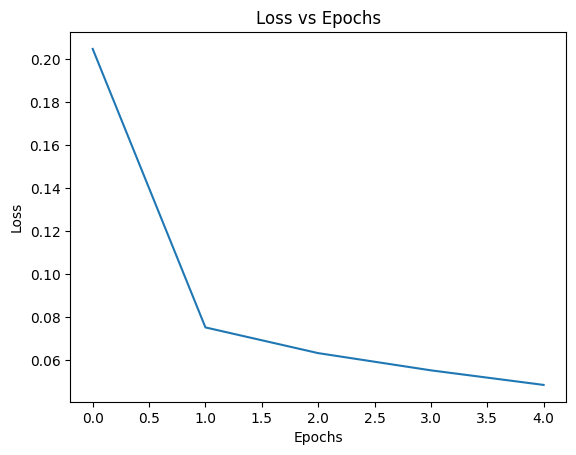

In [42]:

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [48]:
def evaluate_model(model, scaled_test_images, test_labels):

  test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=2)

  return test_loss, test_accuracy

In [51]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0790 - accuracy: 0.9783 - 804ms/epoch - 3ms/step
Test loss: 0.07897181063890457
Test accuracy: 0.9782999753952026


1/1 [==============================] - 0s 92ms/step


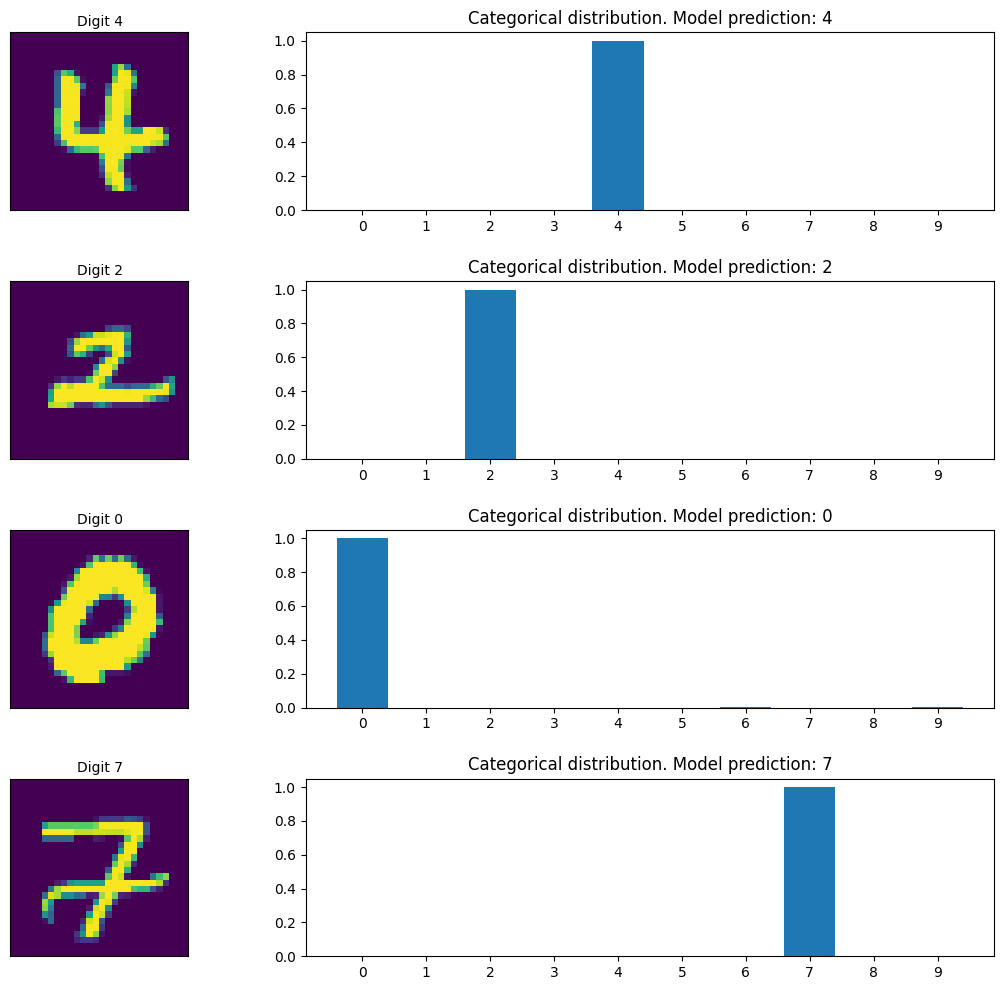

In [52]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

1/1 [==============================] - 0s 92ms/step


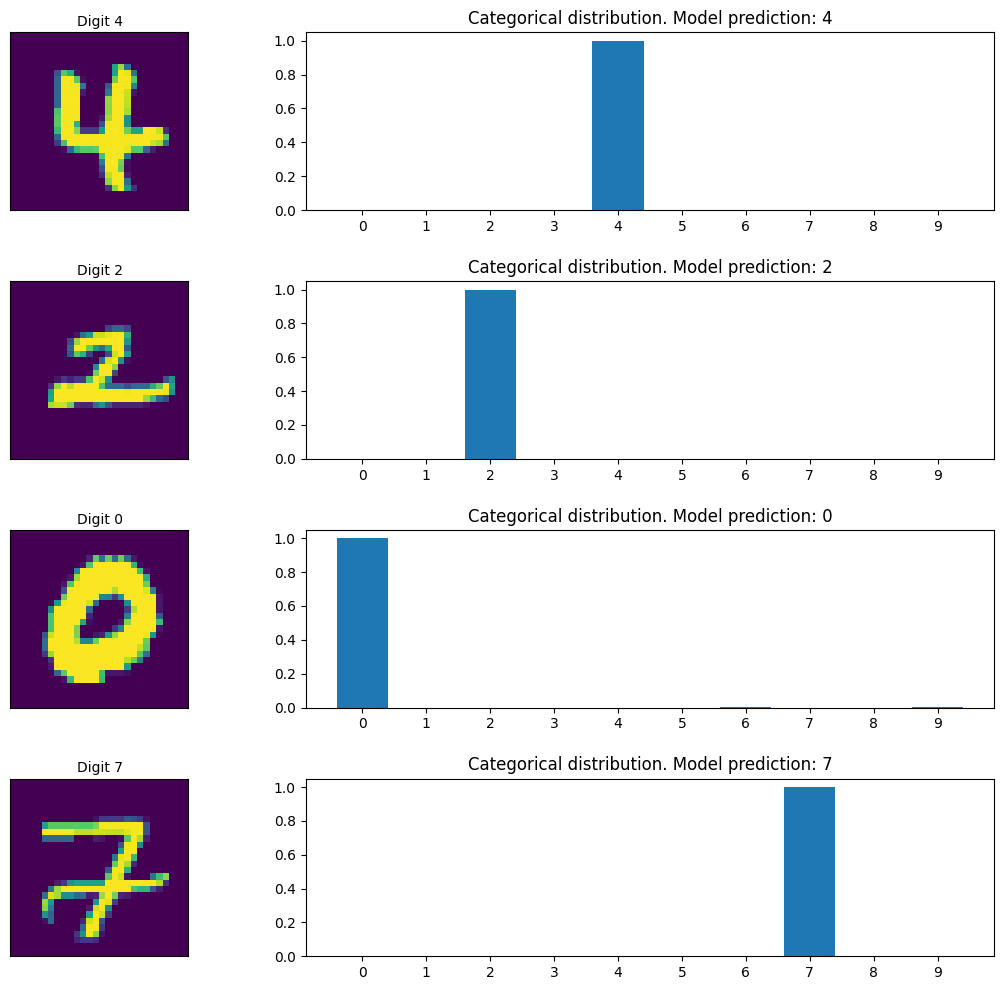

In [ ]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

1/1 [==============================] - 0s 92ms/step


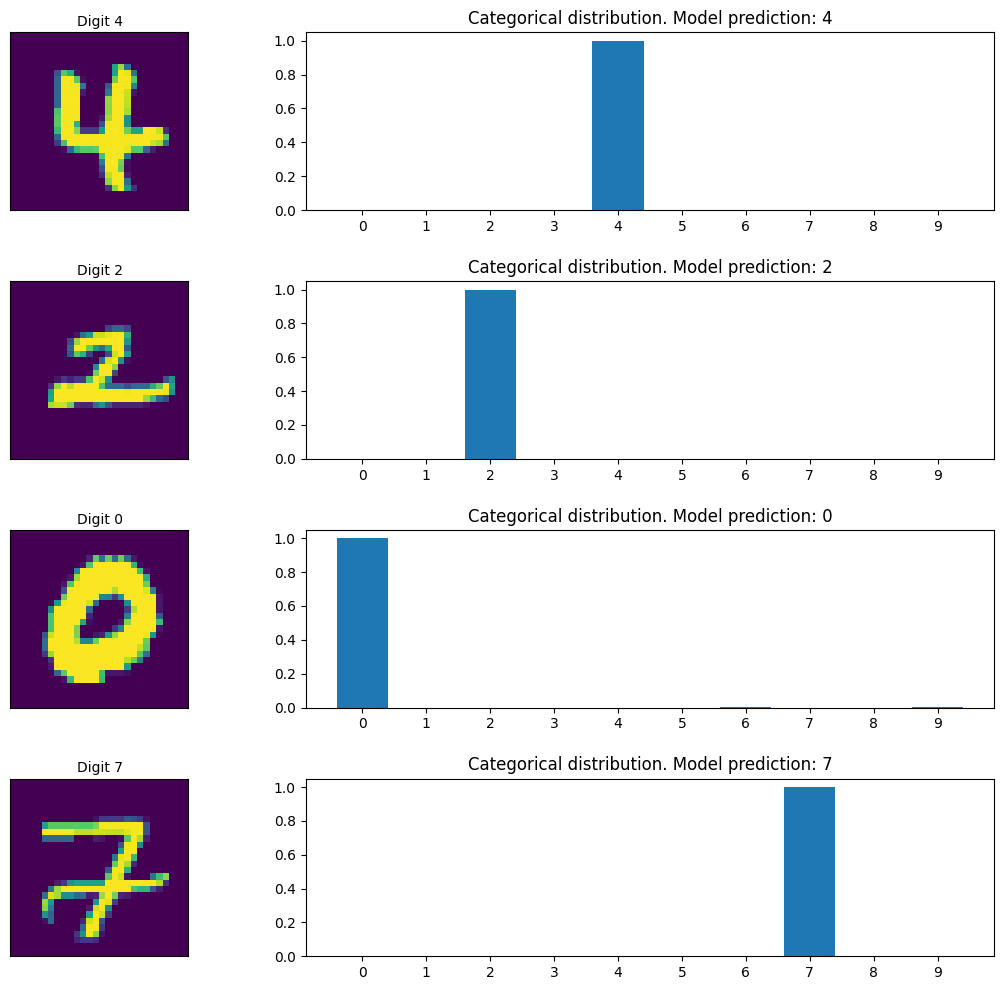

In [ ]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")